# Disability Status in Los Angeles Census Tracts
## Adam Lipsey

In [1]:
import pandas as pd

In [2]:
import geopandas as gpd

In [3]:
disabled = gpd.read_file('Data/Disability_Status_(census_tract).shp')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [7]:
# Look at the top entries in the data set to get a sense of how it's structured.

In [4]:
disabled.head()

,tract,disabled,disabled_u,disabled_p,sup_dist,csa,spa,ESRI_OID,Shape__Are,Shape__Len,geometry
0,06037199900,378,2687,14.1,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2347,4.782361e+06,10141.728022,"POLYGON ((-118.21528 34.06349, -118.21547 34.0..."
1,06037199700,385,3006,12.8,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2348,1.041050e+07,13808.463241,"POLYGON ((-118.22672 34.06242, -118.22453 34.0..."
2,06037199801,269,3618,7.4,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2349,3.724107e+06,9459.391827,"POLYGON ((-118.21559 34.07186, -118.21169 34.0..."
3,06037199802,359,2419,14.8,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2350,3.296129e+06,8868.744225,"POLYGON ((-118.21563 34.07365, -118.21309 34.0..."
4,06037201110,245,2203,11.1,District 1,Los Angeles - El Sereno,SPA 4 - Metro,2351,1.099246e+07,15893.383636,"POLYGON ((-118.18182 34.09277, -118.18039 34.0..."


In [ ]:
# Count the dimensions of the dataset.

In [13]:
disabled.shape

(2495, 11)

In [18]:
# Check the data type for each column.

In [19]:
disabled.dtypes

tract           object
disabled         int64
disabled_u       int64
disabled_p     float64
sup_dist        object
csa             object
spa             object
ESRI_OID         int64
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object

In [20]:
# Here we see that the tracts (unique identifier) is an object, so the leading zero problem is irrelevant.

In [22]:
# Check to see which columns are only empty values.

In [23]:
disabled.columns[disabled.isna().all()].tolist()

[]

In [26]:
# Create a list with only relevant columns (e.g., drop 'disabled').

In [33]:
columns_kept = ['tract', 'disabled_p', 'sup_dist', 'csa', 'spa', 'ESRI_OID', 'Shape__Are', 'Shape__Len', 'geometry']

In [36]:
# Make a new dataframe called 'disabled2' with only the relevant columns saved as a list called 'columns_kept'.

In [37]:
disabled2 = disabled[columns_kept]

In [38]:
# Preview the new dataframe.

In [39]:
disabled2.head()

,tract,disabled_p,sup_dist,csa,spa,ESRI_OID,Shape__Are,Shape__Len,geometry
0,06037199900,14.1,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2347,4.782361e+06,10141.728022,"POLYGON ((-118.21528 34.06349, -118.21547 34.0..."
1,06037199700,12.8,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2348,1.041050e+07,13808.463241,"POLYGON ((-118.22672 34.06242, -118.22453 34.0..."
2,06037199801,7.4,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2349,3.724107e+06,9459.391827,"POLYGON ((-118.21559 34.07186, -118.21169 34.0..."
3,06037199802,14.8,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2350,3.296129e+06,8868.744225,"POLYGON ((-118.21563 34.07365, -118.21309 34.0..."
4,06037201110,11.1,District 1,Los Angeles - El Sereno,SPA 4 - Metro,2351,1.099246e+07,15893.383636,"POLYGON ((-118.18182 34.09277, -118.18039 34.0..."


In [46]:
# Check to see what the name of the second column is.

In [47]:
disabled2.columns[1]

'dis_pct'

In [48]:
# Rename columns for clarity.

In [44]:
disabled2.columns = ['tract', 'dis_pct', 'sup_dist', 'csa', 'spa', 'ESRI_OID', 'Shape_Area', 'Shape_Length', 'geometry']

In [45]:
disabled2.head()

,tract,dis_pct,sup_dist,csa,spa,ESRI_OID,Shape_Area,Shape_Length,geometry
0,06037199900,14.1,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2347,4.782361e+06,10141.728022,"POLYGON ((-118.21528 34.06349, -118.21547 34.0..."
1,06037199700,12.8,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2348,1.041050e+07,13808.463241,"POLYGON ((-118.22672 34.06242, -118.22453 34.0..."
2,06037199801,7.4,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2349,3.724107e+06,9459.391827,"POLYGON ((-118.21559 34.07186, -118.21169 34.0..."
3,06037199802,14.8,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2350,3.296129e+06,8868.744225,"POLYGON ((-118.21563 34.07365, -118.21309 34.0..."
4,06037201110,11.1,District 1,Los Angeles - El Sereno,SPA 4 - Metro,2351,1.099246e+07,15893.383636,"POLYGON ((-118.18182 34.09277, -118.18039 34.0..."


In [49]:
disabled2_sorted = disabled2.sort_values(by = 'dis_pct', ascending = False)

In [50]:
disabled2_sorted.head()

,tract,dis_pct,sup_dist,csa,spa,ESRI_OID,Shape_Area,Shape_Length,geometry
2229,06037980033,100.0,District 4,City of Long Beach,SPA 8 - South Bay,4576,3.061391e+08,76112.964182,"POLYGON ((-118.24117 33.75855, -118.24546 33.7..."
136,06037206301,60.8,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2483,1.467235e+06,4941.872097,"POLYGON ((-118.24901 34.04460, -118.24758 34.0..."
2084,06037980014,48.9,District 4,Los Angeles - Wilmington,SPA 8 - South Bay,4431,8.046195e+07,67612.005399,"POLYGON ((-118.26089 33.76851, -118.25631 33.7..."
138,06037206303,48.8,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2485,4.692073e+06,10612.528556,"POLYGON ((-118.24525 34.04226, -118.24390 34.0..."
2087,06037980017,45.3,District 3,Unincorporated - West LA,SPA 5 - West,4434,2.567185e+07,29447.047449,"POLYGON ((-118.46891 34.06588, -118.46674 34.0..."


In [76]:
# Sort the top 10 disabled percentages to get a sense of the higher end.

<AxesSubplot: xlabel='tract'>

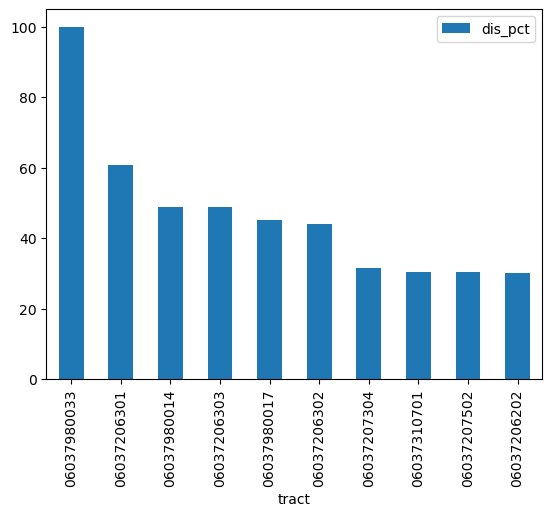

In [77]:
disabled2_sorted.head(10).plot.bar(x = 'tract', y = 'dis_pct')

In [ ]:
# Sort the bottom 10 percentagesto get a sense of the lower end.

In [73]:
# Visual breakdown of census tracts by percentage of disabled population.

<AxesSubplot: >

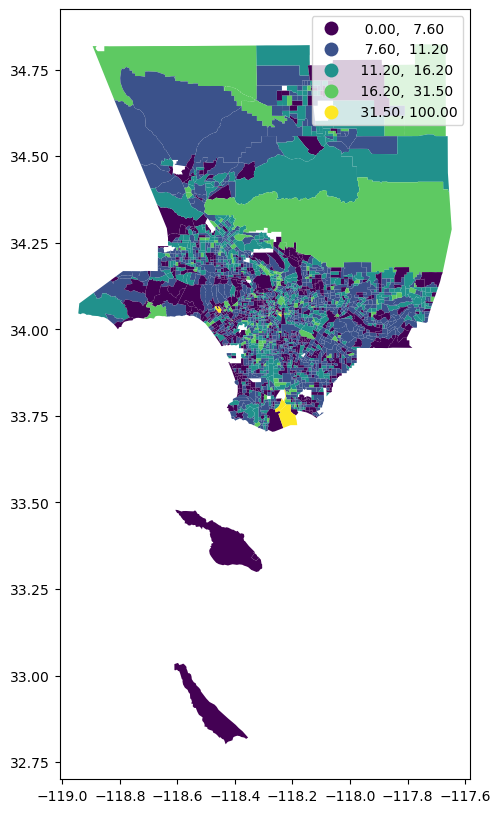

In [75]:
disabled2.plot(figsize = (12, 10), column = 'dis_pct', legend = True, scheme = 'NaturalBreaks')